In [4]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import os 
import math
import sys
from pathlib import Path
import seaborn as sns

# Add 'src' to the system path
sys.path.append(str(Path().resolve() / 'src'))
from src.data.process_data import *
from src.data.clean_data import *

IMPORTANT: these scripts/functions assume you have the following files in the data/raw directory:
- From the CMU dataset: 
    - movie.metadata.tsv
    - plot_summaries.txt
- From the TMDB dataset: 
    - TMDB_movie_dataset_v11.csv

AND have data/processed folder created

Note: download CMU dataset here: https://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz
and TMDB dataset here (Download button): https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies

In [9]:
# from raw files, creates clean datafiles
%run src/data/clean_data.py

sep ,
headers []
original df shape (1129691, 24)
after status (1104269, 24)
after release date (760732, 24)
after release year (760732, 25)
after duplicates (746366, 25)
after numeric columns (746365, 25)
after select columns (746365, 13)
sep 	
headers ['wikipedia_movie_id', 'freebase_ID', 'title', 'release_year', 'revenue', 'runtime', 'languages', 'countries', 'genres']
original df shape (81740, 9)
after status (81740, 9)
after release date (81740, 9)
after release year (44006, 9)
after duplicates (43915, 9)
after numeric columns (43915, 9)
after select columns (43915, 5)


In [10]:
# from clean data files, creates a dataframe with CMU + plots & TMDB movies 
df_combined = create_cmu_tmdb_dataset('data/processed/movies.csv','data/processed/plot_summaries.csv', 'data/processed/TMDB_clean.csv', 'inner')

In [11]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19621 entries, 0 to 19620
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   title                 19621 non-null  object
 1   release_year          19621 non-null  int64 
 2   summary               19621 non-null  object
 3   release_date          19621 non-null  object
 4   budget                19621 non-null  int64 
 5   original_language     19621 non-null  object
 6   overview              19621 non-null  object
 7   genres                19621 non-null  object
 8   production_companies  19621 non-null  object
 9   production_countries  19621 non-null  object
 10  spoken_languages      19621 non-null  object
 11  keywords              19621 non-null  object
 12  revenue               19621 non-null  int64 
 13  runtime               19621 non-null  int64 
 14  dvd_era               19621 non-null  object
dtypes: int64(4), object(11)
memory usage

In [12]:
df_combined.head()

,title,release_year,summary,release_date,budget,original_language,overview,genres,production_companies,production_countries,spoken_languages,keywords,revenue,runtime,dvd_era
0,White Of The Eye,1987,A series of murders of rich young women throug...,1987-06-19,0,en,"In a wealthy and isolated desert community, a ...","[Horror, Thriller]",[Mrs. White's Productions],[United Kingdom],[English],"[based on novel or book, gas station, psychopa...",0,221,pre
1,A Woman in Flames,1983,"Eva, an upper class housewife, becomes frustra...",1983-05-11,0,de,"Eva, an upper-class housewife, frustratedly le...",[Drama],[Dieter Geissler Filmproduktion],[Germany],[German],"[jealousy, eroticism, gigolo, longing, dominat...",0,212,pre
2,The Sorcerer's Apprentice,2002,"Every hundred years, the evil Morgana returns...",2002-04-12,0,en,"Every hundred years, the evil sorceress Morgan...","[Adventure, Family, Fantasy]","[Peakviewing Productions, Peakviewing Transatl...",[United Kingdom],"[French, English]",[morgana],0,172,during
3,Little city,1997,"Adam, a San Francisco-based artist who works a...",1997-04-04,0,en,Best friends Adam and Kevin have a lot in comm...,"[Comedy, Romance]","[Bandeira Entertainment, Miramax]",[],[English],[],0,183,pre
4,Henry V,1989,{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...,1989-10-05,9000000,en,Gritty adaption of William Shakespeare's play ...,"[War, Drama, History]","[BBC Film, Renaissance Films, Samuel Goldwyn C...",[United Kingdom],[English],"[france, kingdom, theater play, based on true ...",20337800,274,pre


In [1]:
#test

In [13]:
import pyreadr
import pandas as pd
import matplotlib.pyplot as plt

# Load the RData file
result = pyreadr.read_r('/Users/ravotyann/Desktop/ADA/movies.RData')  # Replace with your actual path

# Extract the DataFrame (assuming it contains only one DataFrame)
df = next(iter(result.values()))

# Display the first few rows to understand the structure
print(df.head())


                  title    title_type   genre  runtime mpaa_rating  \
0           Filly Brown  Feature Film   Drama     80.0           R   
1              The Dish  Feature Film   Drama    101.0       PG-13   
2   Waiting for Guffman  Feature Film  Comedy     84.0           R   
3  The Age of Innocence  Feature Film   Drama    139.0          PG   
4           Malevolence  Feature Film  Horror     90.0           R   

                     studio  thtr_rel_year  thtr_rel_month  thtr_rel_day  \
0       Indomina Media Inc.         2013.0             4.0          19.0   
1     Warner Bros. Pictures         2001.0             3.0          14.0   
2    Sony Pictures Classics         1996.0             8.0          21.0   
3         Columbia Pictures         1993.0            10.0           1.0   
4  Anchor Bay Entertainment         2004.0             9.0          10.0   

   dvd_rel_year  ...  best_dir_win  top200_box           director  \
0        2013.0  ...            no          no   Mich

In [14]:
# Combine the year, month, and day columns to create a datetime column
df['dvd_release_date'] = pd.to_datetime(
    df[['dvd_rel_year', 'dvd_rel_month', 'dvd_rel_day']]
    .astype('Int64')
    .astype(str)
    .agg('-'.join, axis=1), 
    errors='coerce'
)

# Display the first few rows to check the new column
print(df[['dvd_rel_year', 'dvd_rel_month', 'dvd_rel_day', 'dvd_release_date']].head())


   dvd_rel_year  dvd_rel_month  dvd_rel_day dvd_release_date
0        2013.0            7.0         30.0       2013-07-30
1        2001.0            8.0         28.0       2001-08-28
2        2001.0            8.0         21.0       2001-08-21
3        2001.0           11.0          6.0       2001-11-06
4        2005.0            4.0         19.0       2005-04-19


/var/folders/qb/qcqtgmn507n9lry48pqshj0r0000gp/T/ipykernel_27057/2407879785.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_grouped = df.resample('M', on='dvd_release_date').size()


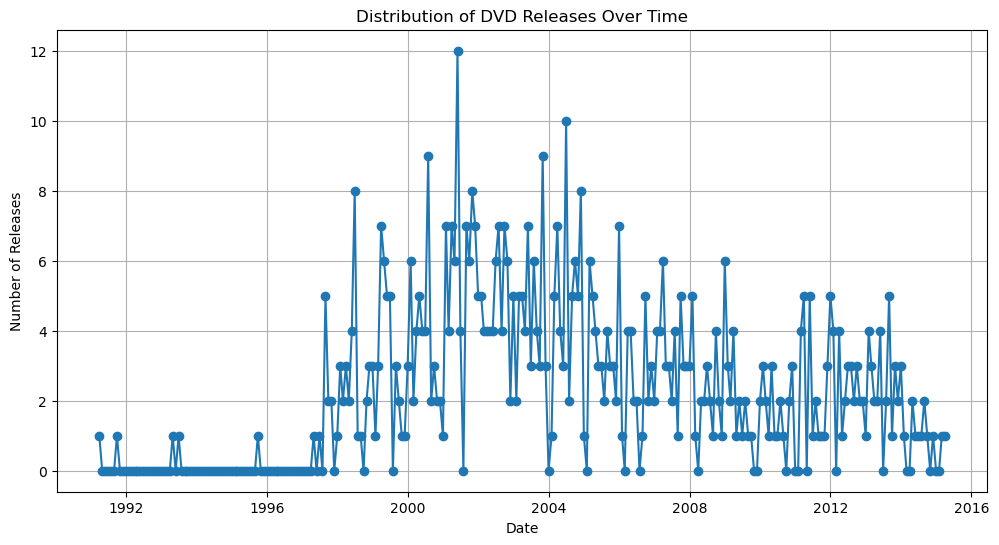

In [15]:
# Drop rows where the date is missing (optional)
df = df.dropna(subset=['dvd_release_date'])

# Group by month and count the number of DVD releases
df_grouped = df.resample('M', on='dvd_release_date').size()

# Plot the distribution
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped.values, marker='o')
plt.title('Distribution of DVD Releases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()


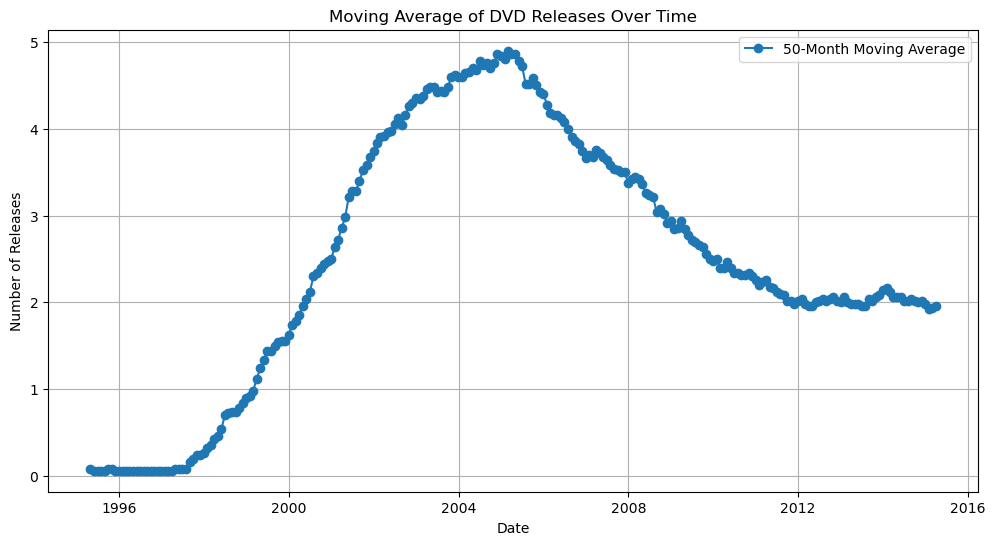

In [18]:
# Calculate the moving average (e.g., 6-month window)
moving_avg = df_grouped.rolling(window=50).mean()
# Plot the moving average
plt.figure(figsize=(12, 6))
plt.plot(moving_avg.index, moving_avg.values, marker='o', label='50-Month Moving Average')
plt.title('Moving Average of DVD Releases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.legend()
plt.show()

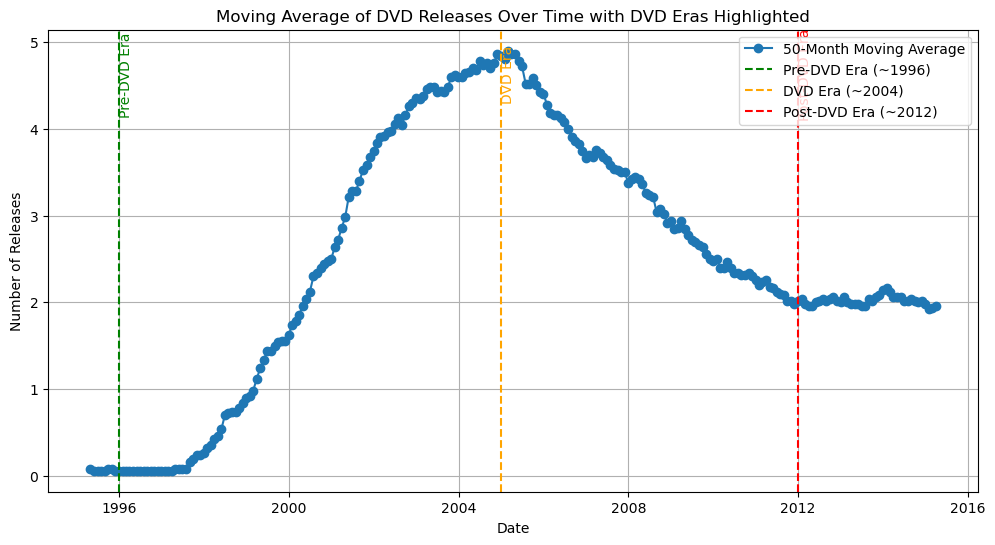

In [21]:
# Plot the moving average
plt.figure(figsize=(12, 6))
plt.plot(moving_avg.index, moving_avg.values, marker='o', label='50-Month Moving Average')

# Add vertical lines for different eras
plt.axvline(pd.Timestamp('1996-01-01'), color='green', linestyle='--', label='Pre-DVD Era (~1996)')
plt.axvline(pd.Timestamp('2005-01-01'), color='orange', linestyle='--', label='DVD Era (~2004)')
plt.axvline(pd.Timestamp('2012-01-01'), color='red', linestyle='--', label='Post-DVD Era (~2012)')

# Add text annotations
plt.text(pd.Timestamp('1996-01-01'), plt.ylim()[1] * 0.9, 'Pre-DVD Era', color='green', rotation=90, va='center')
plt.text(pd.Timestamp('2005-01-01'), plt.ylim()[1] * 0.9, 'DVD Era', color='orange', rotation=90, va='center')
plt.text(pd.Timestamp('2012-01-01'), plt.ylim()[1] * 0.9, 'Post-DVD Era', color='red', rotation=90, va='center')

# Add labels and legend
plt.title('Moving Average of DVD Releases Over Time with DVD Eras Highlighted')
plt.xlabel('Date')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.legend()
plt.show()


/Users/ravotyann/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ravotyann/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ravotyann/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ravotyann/anaconda3/lib/python3.11/site-packages/seaborn/_oldc

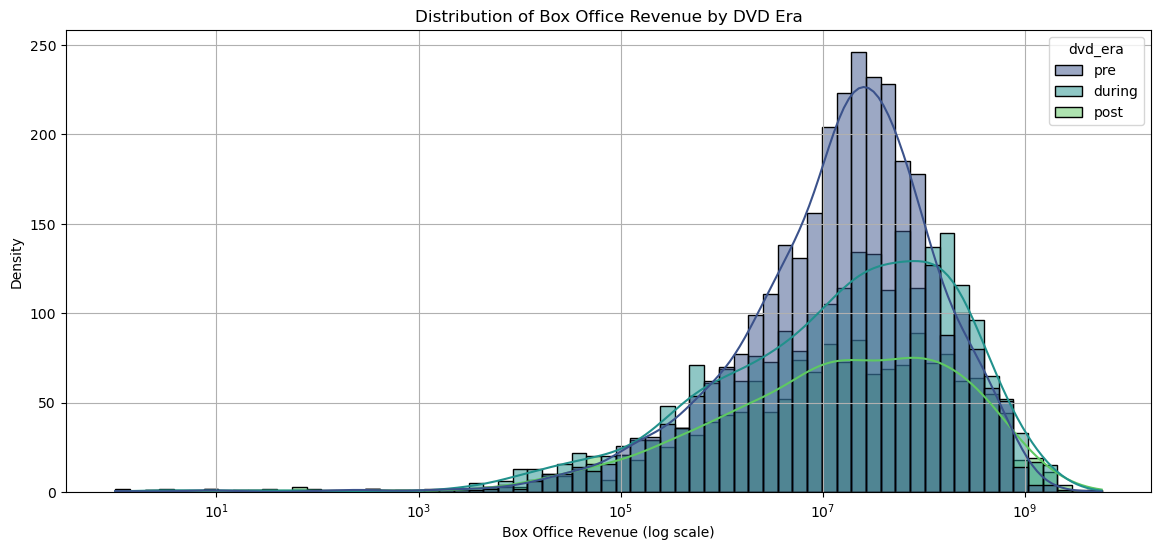


Summary statistics for pre DVD era:
count    3.179000e+03
mean     7.184131e+07
std      1.670339e+08
min      1.000000e+00
25%      4.243000e+06
50%      1.930636e+07
75%      6.149081e+07
max      4.449535e+09
Name: revenue, dtype: float64

Summary statistics for during DVD era:
count    2.525000e+03
mean     1.107000e+08
std      2.305336e+08
min      1.000000e+00
25%      2.415513e+06
50%      2.217591e+07
75%      1.148301e+08
max      2.238818e+09
Name: revenue, dtype: float64

Summary statistics for post DVD era:
count    1.642000e+03
mean     1.278721e+08
std      3.079294e+08
min      2.000000e+00
25%      2.161958e+06
50%      1.798979e+07
75%      1.094977e+08
max      5.705981e+09
Name: revenue, dtype: float64


In [25]:
# Convert 'release_date' to datetime format if not already in that format
df_combined['release_date'] = pd.to_datetime(df_combined['release_date'], errors='coerce')

# Ensure 'revenue' is numeric
df_combined['revenue'] = pd.to_numeric(df_combined['revenue'], errors='coerce')

# Filter out movies with missing or zero revenue data
df_combined_filtered = df_combined[df_combined['revenue'] > 0]

# Plot revenue distributions for each DVD era
plt.figure(figsize=(14, 6))
sns.histplot(data=df_combined_filtered, x='revenue', hue='dvd_era', kde=True, log_scale=True, palette='viridis')
plt.title('Distribution of Box Office Revenue by DVD Era')
plt.xlabel('Box Office Revenue (log scale)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Summary statistics for each DVD era
for era in ['pre', 'during', 'post']:
    print(f"\nSummary statistics for {era} DVD era:")
    print(df_combined_filtered[df_combined_filtered['dvd_era'] == era]['revenue'].describe())


In [ ]:
#Peak DVD era has the most success in terms of Revenue
#--> Due to the success of DVD rentals (Sales)
#The peak DVD era had more consistent mid-to-high revenue movies compared to the post-DVD era, where revenue distribution became more uneven.